In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
flight_dframe = flight_dframe.pivot('month','year','passengers')  # 行：month, 列：year  値:  乗客数

In [6]:
flight_dframe.columns.name

'year'

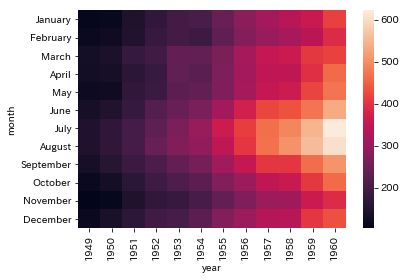

In [6]:
sns.heatmap(flight_dframe)

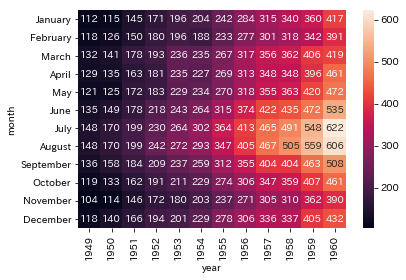

In [7]:
# 数字を書き込めます。
sns.heatmap(flight_dframe, annot=True, fmt='d')  # annot(annotation: 注記), 数字なのでfmt='d'   format文字列で'd'は整数という意味

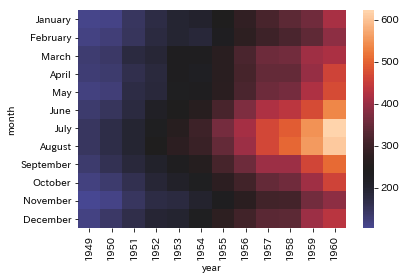

In [8]:
#中心(今だと、['January',1955]が中心、基準)を指定して、色を変えられます。
sns.heatmap(flight_dframe, center=flight_dframe.loc['January',1955])

In [9]:
flight_dframe.sum()  # 行方向に関してsumしてくれる

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

In [10]:
np.sum(flight_dframe)# axis=0がdefault

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

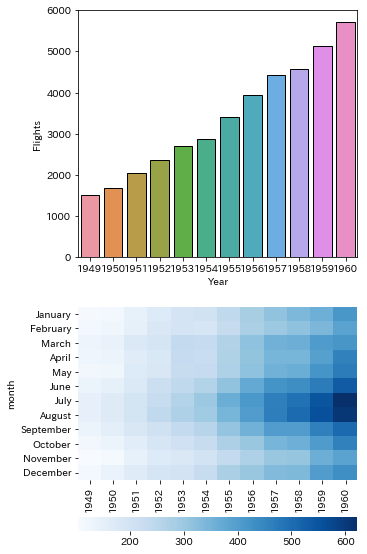

In [11]:
f, (axis1, axis2) = plt.subplots(2,1, figsize=(5, 10))

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot(x='Year', y='Flights', data=year_dframe, ax=axis1) # 棒グラフ
sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation':'horizontal'})  # colorbarを水平方向に書く  fig.colorbarのドキュメント参照

In [12]:
yearly_flights.index.values

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [13]:
yearly_flights.values

array([1520, 1676, 2042, 2364, 2700, 2867, 3408, 3939, 4421, 4572, 5140,
       5714])

In [14]:
year_dframe

,Year,Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


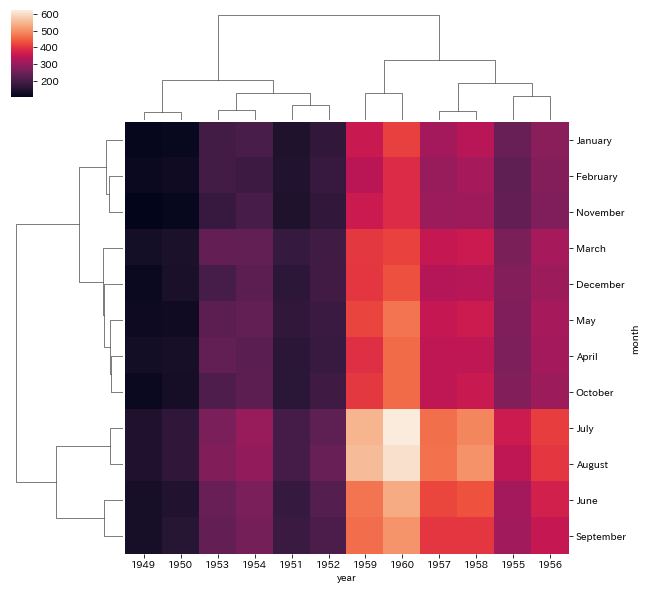

In [15]:
# クラスタリングしてheatmapがかける。
sns.clustermap(flight_dframe)

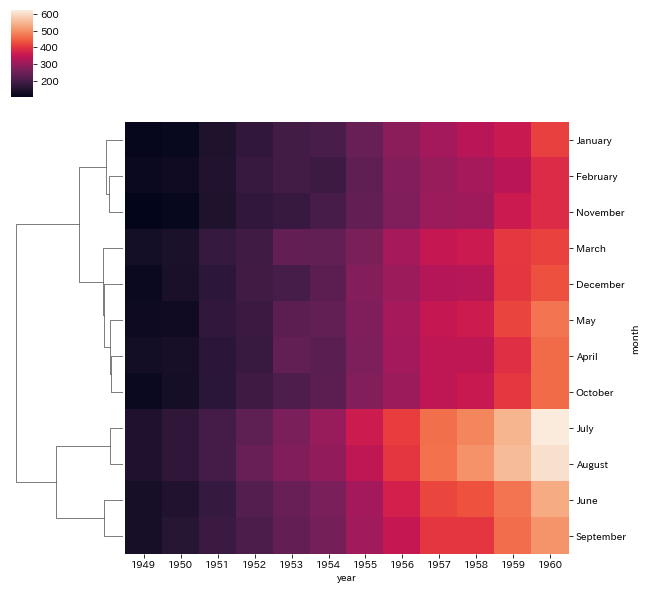

In [16]:
sns.clustermap(flight_dframe, col_cluster=False)  # 列方向のクラスタリングをしない

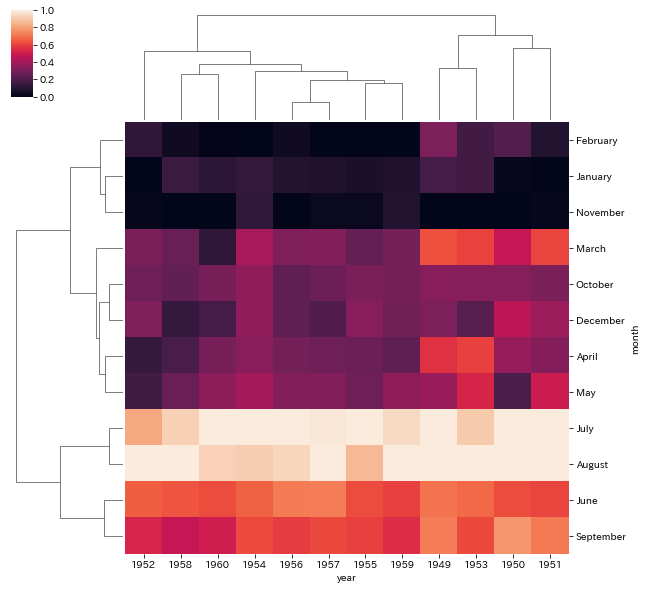

In [17]:
# データの標準化ができる。  standard_scale=1 で列の次元を標準化
sns.clustermap(flight_dframe, standard_scale=1)

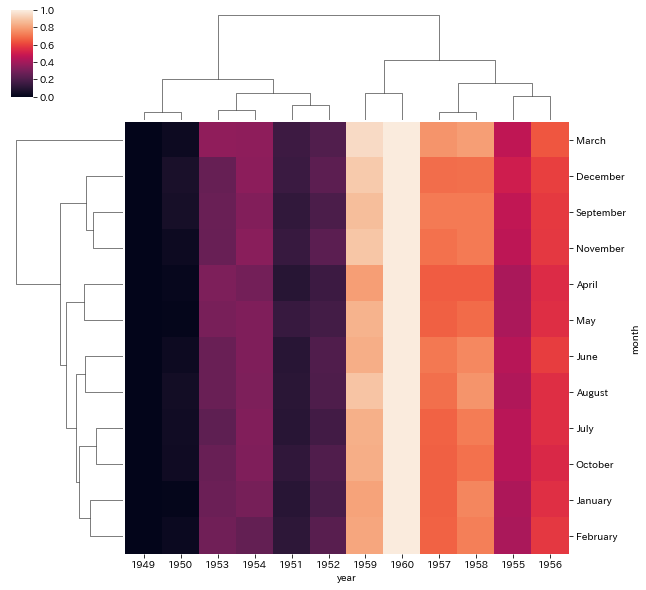

In [18]:
sns.clustermap(flight_dframe, standard_scale=0)

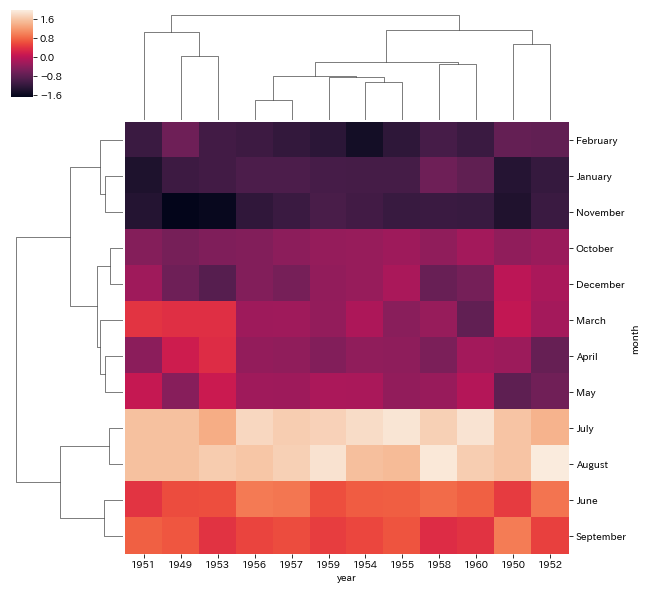

In [19]:
sns.clustermap(flight_dframe, z_score=1)  # z_score=1（列）により各列の平均が０　分散　１　となる。

In [20]:
years = pd.Series(yearly_flights.index.values)

In [21]:
yearly_flights.index

Int64Index([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
            1960],
           dtype='int64', name='year')

In [22]:
yearly_flights.index.values

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [23]:
years

0     1949
1     1950
2     1951
3     1952
4     1953
5     1954
6     1955
7     1956
8     1957
9     1958
10    1959
11    1960
dtype: int64

In [24]:
years=pd.DataFrame(years)

In [25]:
years

,0
0,1949
1,1950
2,1951
3,1952
4,1953
5,1954
6,1955
7,1956
8,1957
9,1958


In [26]:
flights = pd.DataFrame(yearly_flights.values)

In [27]:
flights

,0
0,1520
1,1676
2,2042
3,2364
4,2700
5,2867
6,3408
7,3939
8,4421
9,4572


In [28]:
flights = pd.Series(yearly_flights.values)

In [29]:
flights=pd.DataFrame(flights)

In [30]:
flights

,0
0,1520
1,1676
2,2042
3,2364
4,2700
5,2867
6,3408
7,3939
8,4421
9,4572


In [31]:
year_dframe=pd.concat((years, flights), axis=1)

In [32]:
year_dframe.columns = ['Year', 'Flights']

In [33]:
year_dframe.columns

Index(['Year', 'Flights'], dtype='object')

In [34]:
x = np.arange(9).reshape(3,3)

In [35]:
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [36]:
np.sum(x, axis=1)

array([ 3, 12, 21])